In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from IPython.display import display

NHTS_data = pd.read_csv('NHTS.csv')
NGSIM_data = pd.read_csv('NGSIM.csv')
print(NHTS_data)
print(NGSIM_data)

       household_id     census_division census_region  driver_count  \
0        9000013002         New England     Northeast             2   
1        9000013002         New England     Northeast             2   
2        9000013016         New England     Northeast             2   
3        9000013039         New England     Northeast             2   
4        9000013041         New England     Northeast             1   
...             ...                 ...           ...           ...   
14679    9000218013  East South Central         South             1   
14680    9000218021  East South Central         South             1   
14681    9000218034  East South Central         South             2   
14682    9000218034  East South Central         South             2   
14683    9000218040  East South Central         South             1   

         household_income  household_size  household_workers  \
0        $175,000 or more               4                  1   
1        $175,000 o

<Figure size 2000x1500 with 0 Axes>

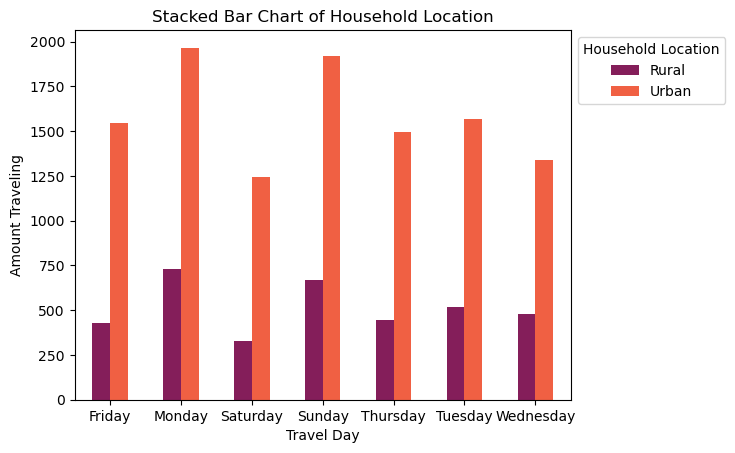

In [32]:
#BAR GRAPH
# Plotting
plt.figure(figsize=(20,15))

data_grouped = NHTS_data.groupby(['travel_day','household_location']).size().unstack(fill_value=0)

data_grouped.plot(kind='bar',stacked=False, color = sns.color_palette('rocket',len(data_grouped.columns)))

plt.title('Stacked Bar Chart of Household Location')
plt.xlabel('Travel Day')
plt.ylabel('Amount Traveling')
plt.xticks(rotation=0)

plt.legend(title = 'Household Location', bbox_to_anchor = (1,1), loc='upper left')

plt.tight_layout 
plt.show()

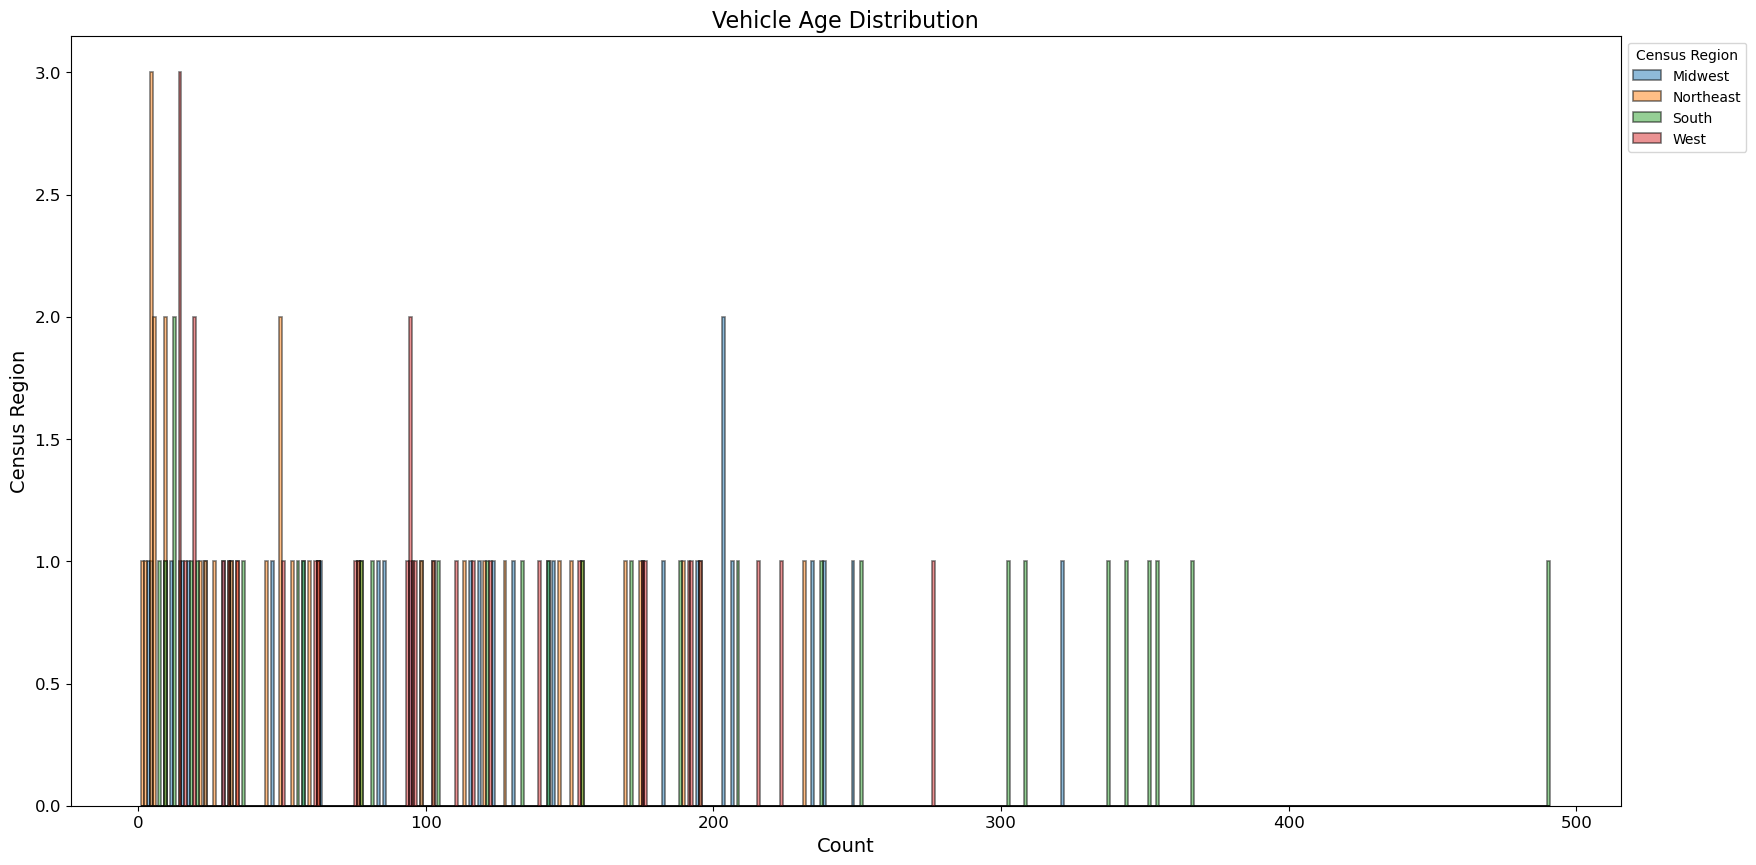

In [36]:
#HISTOGRAM
plt.figure(figsize=(20,10))

data_grouped = NHTS_data.groupby(['census_region','vehicle_age']).size().unstack(fill_value=0)
bin_edges = range(int(data_grouped.min().min()), int(data_grouped.max().max()) + 1, 1)

for make in data_grouped.index:
    plt.hist(data_grouped.loc[make], bins=bin_edges, alpha=0.5, label=make,edgecolor = 'black',linewidth=1.2)


plt.title('Vehicle Age Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Census Region', fontsize=14)
plt.legend(title = 'Census Region', bbox_to_anchor = (1,1), loc='upper left')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

<Figure size 1200x600 with 0 Axes>

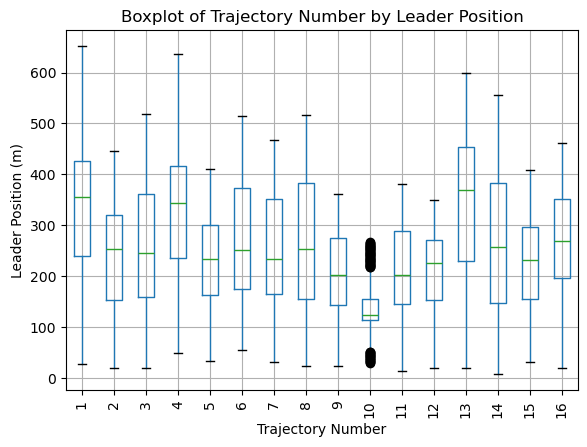

In [45]:
#BOXPLOT

plt.figure(figsize=(12,6))

boxplot = NGSIM_data.boxplot(column='leader_position(m)',by='trajectory_number')

plt.xticks(rotation=90)


plt.xlabel('Trajectory Number')
plt.ylabel('Leader Position (m)')


plt.title('Boxplot of Trajectory Number by Leader Position')

plt.suptitle('')
plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<function matplotlib.pyplot.show(close=None, block=None)>

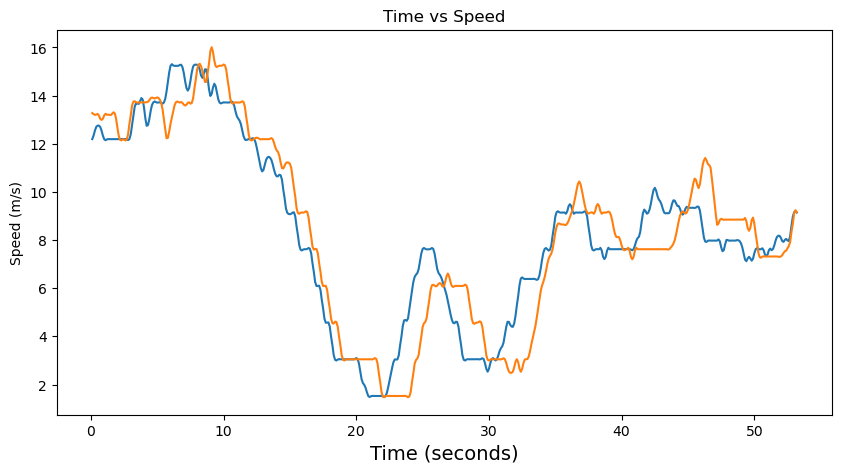

In [41]:
#TIME-SERIES 1
trajectory_number = 16
data_subset = NGSIM_data[NGSIM_data['trajectory_number']==16]
plt.figure(figsize=(10,5))
sns.lineplot(x='Time',y='leader_speed(m/s)',data=data_subset)
sns.lineplot(x='Time',y='follower_speed(m/s)',data=data_subset)
plt.title('Time vs Speed')
plt.xlabel('Time (seconds)', fontsize = 14)
plt.ylabel('Speed (m/s)')
plt.show


/tmp/ipykernel_504/3162852029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['gap']=data_subset['leader_position(m)']-data_subset['follower_position(m)']
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

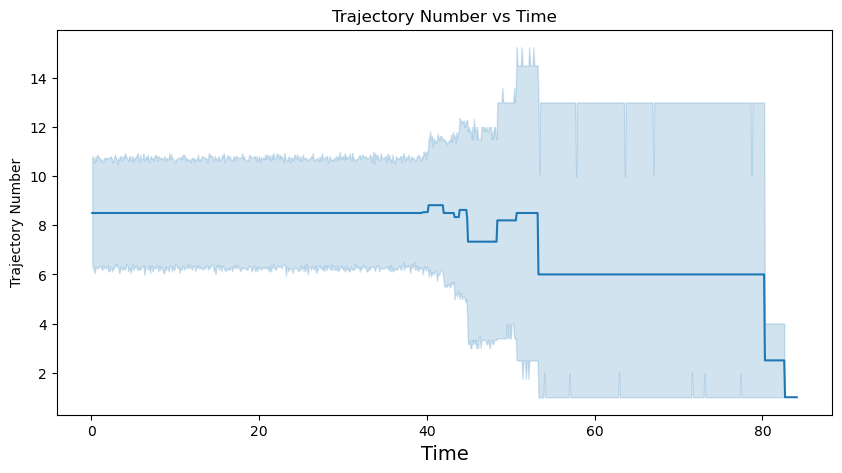

In [50]:
#TIME-SERIES 2

plt.figure(figsize=(10,5))
data_subset['gap']=data_subset['leader_position(m)']-data_subset['follower_position(m)']
sns.lineplot(x='Time',y='trajectory_number',data=NGSIM_data)
plt.title('Trajectory Number vs Time')
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Trajectory Number')
plt.show